In [1]:
"""
plots of outputs of 28_singlegenemodel.py
modified from: 11_crossplots.ipynb

Shaina Lu
Zador & Gillis Labs
July 2020
"""

'\nplots of outputs of 28_singlegenemodel.py\nmodified from: 11_crossplots.ipynb\n\nShaina Lu\nZador & Gillis Labs\nJuly 2020\n'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

In [3]:
#function for matplotlib formatting
def set_style():
    plt.style.use(['seaborn-white','seaborn-notebook'])
    plt.rcParams['figure.figsize'] = [6,4]
    plt.rcParams['axes.spines.top'] = False       #remove top line
    plt.rcParams['axes.spines.right'] = False     #remove right line
    plt.rcParams['axes.linewidth'] = 2.0          #set weight of axes
    plt.rcParams['axes.titlesize'] = 20           #set font size of title
    plt.rcParams['axes.labelsize'] = 18           #set font size of x,y labels
    plt.rcParams['axes.labelpad'] = 14            #space between labels and axes
    plt.rcParams['xtick.labelsize'] = 14          #set x label size
    plt.rcParams['ytick.labelsize'] = 14          #set y label size
    plt.rcParams['legend.fontsize'] = 16          #set legend font size
    
set_style()

# ST to ABA alpha = 0.1

### Read in Data

In [4]:
STTRAIN_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_STtrain0p1_070220.csv"
STTEST_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_STtest0p1_070220.csv"
ABAALL_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_STtoABA0p1_070220.csv"

In [5]:
trainST = pd.read_csv(STTRAIN_FILE, sep=',')
trainST = trainST.set_index(trainST.columns)

testST = pd.read_csv(STTEST_FILE, sep=',')
testST = testST.set_index(testST.columns)

allABA = pd.read_csv(ABAALL_FILE, sep=',')
allABA = allABA.set_index(allABA.columns)

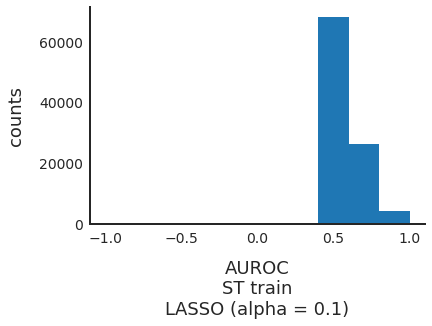

In [6]:
plt.hist(trainST.values[np.triu_indices_from(trainST, k=1)])
plt.xlabel("AUROC\nST train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

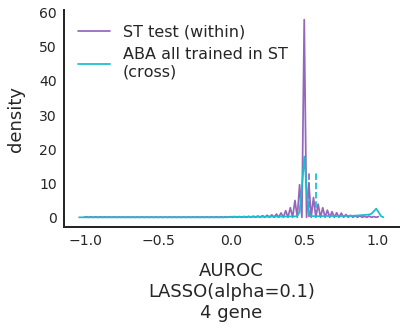

In [7]:
sns.kdeplot(testST.values[np.triu_indices_from(testST, k=1)], label="ST test (within)", color='C4')
sns.kdeplot(allABA.values[np.triu_indices_from(allABA.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9')

#means
plt.vlines(x=np.mean(testST.values[np.triu_indices_from(testST, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABA.values[np.triu_indices_from(allABA, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)\n4 gene")
plt.ylabel("density")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("062920_4.pdf", bbox_inches='tight')
plt.show()

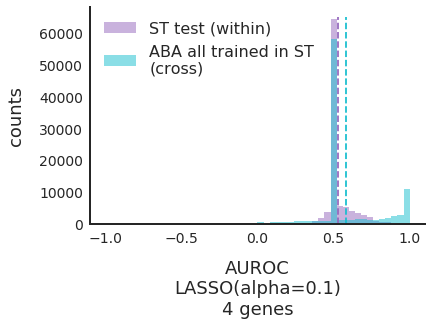

In [11]:
plt.hist(testST.values[np.triu_indices_from(testST, k=1)], label="ST test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allABA.values[np.triu_indices_from(allABA.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testST.values[np.triu_indices_from(testST, k=1)]), ymin=0, ymax=65000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABA.values[np.triu_indices_from(allABA, k=1)]), ymin=0, ymax=65000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)\n4 genes")
plt.ylabel("counts")
plt.legend()#loc=[1.0,0.5])

plt.savefig("070720_5.pdf", bbox_inches='tight')
plt.show()

In [12]:
print(np.mean(testST.values[np.triu_indices_from(testST, k=1)]))
print(np.mean(allABA.values[np.triu_indices_from(allABA.values, k=1)]))

0.5321593198419372
0.5832478095674025


# ST to ABA alpha = 0 linear regression

### Read in Data

In [16]:
STTRAIN_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_STtrain0_070220.csv"
STTEST_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_STtest0_070220.csv"
ABAALL_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_STtoABA0_070220.csv"

In [17]:
trainST = pd.read_csv(STTRAIN_FILE, sep=',')
trainST = trainST.set_index(trainST.columns)

testST = pd.read_csv(STTEST_FILE, sep=',')
testST = testST.set_index(testST.columns)

allABA = pd.read_csv(ABAALL_FILE, sep=',')
allABA = allABA.set_index(allABA.columns)

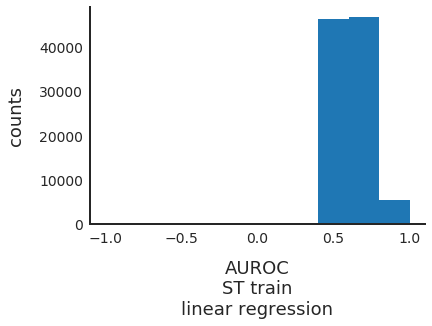

In [18]:
plt.hist(trainST.values[np.triu_indices_from(trainST, k=1)])
plt.xlabel("AUROC\nST train\nlinear regression")
plt.ylabel("counts")
plt.show()

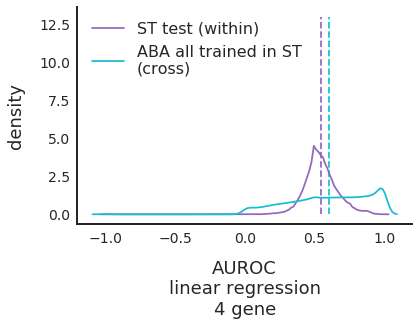

In [21]:
sns.kdeplot(testST.values[np.triu_indices_from(testST, k=1)], label="ST test (within)", color='C4')
sns.kdeplot(allABA.values[np.triu_indices_from(allABA.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9')

#means
plt.vlines(x=np.mean(testST.values[np.triu_indices_from(testST, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABA.values[np.triu_indices_from(allABA, k=1)]), ymin=0, ymax=13, linestyles='--',colors='C9')

plt.xlabel("AUROC\nlinear regression\n4 gene")
plt.ylabel("density")
plt.legend(loc="upper left")#loc=[1.0,0.5])

#plt.savefig("062920_4.pdf", bbox_inches='tight')
plt.show()

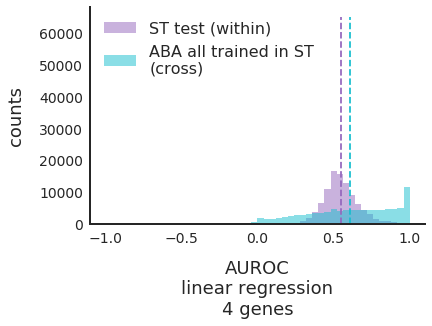

In [24]:
plt.hist(testST.values[np.triu_indices_from(testST, k=1)], label="ST test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allABA.values[np.triu_indices_from(allABA.values, k=1)], label="ABA all trained in ST\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testST.values[np.triu_indices_from(testST, k=1)]), ymin=0, ymax=65000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allABA.values[np.triu_indices_from(allABA, k=1)]), ymin=0, ymax=65000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nlinear regression\n4 genes")
plt.ylabel("counts")
plt.legend(loc="upper left")#loc=[1.0,0.5])

plt.savefig("070720_6.pdf", bbox_inches='tight')
plt.show()

In [25]:
print(np.mean(testST.values[np.triu_indices_from(testST, k=1)]))
print(np.mean(allABA.values[np.triu_indices_from(allABA.values, k=1)]))

0.5456273465911208
0.6054484224653839


# ABA to ST alpha = 0.1

### Read in Data

In [54]:
ABATRAIN_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_ABAtrain0p1_070220.csv"
ABATEST_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_ABAtest0p1_070220.csv"
STALL_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_ABAtoST0p1_070220.csv"

In [43]:
trainABA = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABA = trainABA.set_index(trainABA.columns)

testABA = pd.read_csv(ABATEST_FILE, sep=',')
testABA = testABA.set_index(testABA.columns)

allST = pd.read_csv(STALL_FILE, sep=',')
allST = allST.set_index(allST.columns)

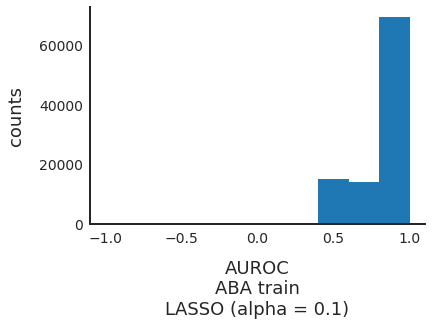

In [44]:
plt.hist(trainABA.values[np.triu_indices_from(trainABA, k=1)])
plt.xlabel("AUROC\nABA train\nLASSO (alpha = 0.1)")
plt.ylabel("counts")
plt.show()

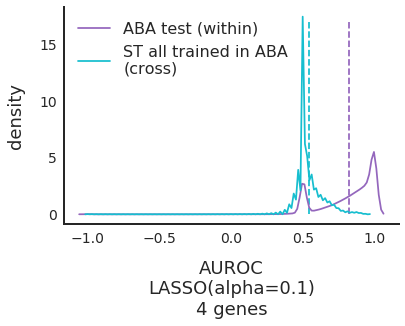

In [45]:
sns.kdeplot(testABA.values[np.triu_indices_from(testABA, k=1)], label="ABA test (within)", color='C4')
sns.kdeplot(allST.values[np.triu_indices_from(allST.values, k=1)], label="ST all trained in ABA\n(cross)", color='C9')

#means
plt.vlines(x=np.mean(testABA.values[np.triu_indices_from(testABA, k=1)]), ymin=0, ymax=17, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allST.values[np.triu_indices_from(allST, k=1)]), ymin=0, ymax=17, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)\n4 genes")
plt.ylabel("density")
plt.legend()#loc=[1.0,0.5])

#plt.savefig("062920_4.pdf", bbox_inches='tight')
plt.show()

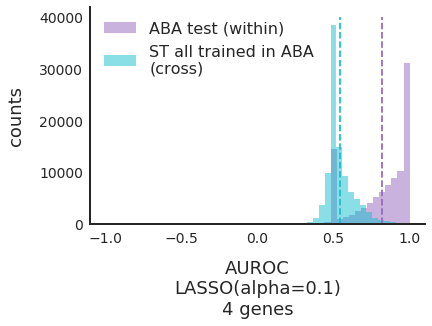

In [46]:
plt.hist(testABA.values[np.triu_indices_from(testABA, k=1)], label="ABA test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allST.values[np.triu_indices_from(allST.values, k=1)], label="ST all trained in ABA\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testABA.values[np.triu_indices_from(testABA, k=1)]), ymin=0, ymax=40000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allST.values[np.triu_indices_from(allST, k=1)]), ymin=0, ymax=40000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nLASSO(alpha=0.1)\n4 genes")
plt.ylabel("counts")
plt.legend(loc="upper left")

#plt.savefig("070720_7.pdf", bbox_inches='tight')
plt.show()

In [47]:
print(np.mean(testST.values[np.triu_indices_from(testST, k=1)]))
print(np.mean(allABA.values[np.triu_indices_from(allABA.values, k=1)]))

0.5456273465911208
0.6054484224653839


# ABA to ST alpha = 0 linear regression

### Read in Data

In [48]:
ABATRAIN_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_ABAtrain0_070220.csv"
ABATEST_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_ABAtest0_070220.csv"
STALL_FILE = "/home/slu/spatial/data/singlegene_lasso/singlegenes_ABAtoST0_070220.csv"

In [49]:
trainABA = pd.read_csv(ABATRAIN_FILE, sep=',')
trainABA = trainABA.set_index(trainABA.columns)

testABA = pd.read_csv(ABATEST_FILE, sep=',')
testABA = testABA.set_index(testABA.columns)

allST = pd.read_csv(STALL_FILE, sep=',')
allST = allST.set_index(allST.columns)

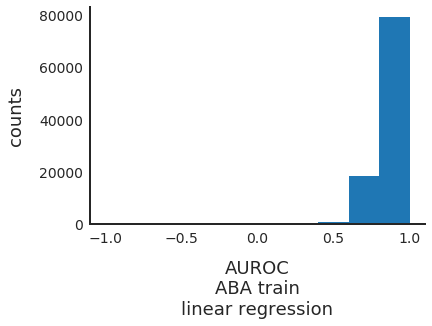

In [50]:
plt.hist(trainABA.values[np.triu_indices_from(trainABA, k=1)])
plt.xlabel("AUROC\nABA train\nlinear regression")
plt.ylabel("counts")
plt.show()

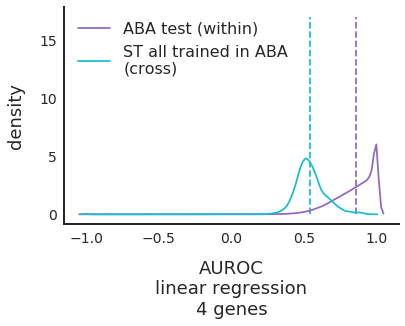

In [51]:
sns.kdeplot(testABA.values[np.triu_indices_from(testABA, k=1)], label="ABA test (within)", color='C4')
sns.kdeplot(allST.values[np.triu_indices_from(allST.values, k=1)], label="ST all trained in ABA\n(cross)", color='C9')

#means
plt.vlines(x=np.mean(testABA.values[np.triu_indices_from(testABA, k=1)]), ymin=0, ymax=17, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allST.values[np.triu_indices_from(allST, k=1)]), ymin=0, ymax=17, linestyles='--',colors='C9')

plt.xlabel("AUROC\nlinear regression\n4 genes")
plt.ylabel("density")
plt.legend(loc="upper left")

#plt.savefig("062920_4.pdf", bbox_inches='tight')
plt.show()

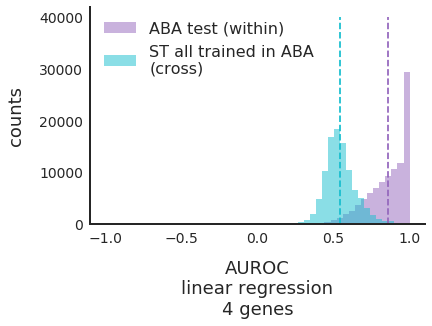

In [52]:
plt.hist(testABA.values[np.triu_indices_from(testABA, k=1)], label="ABA test (within)", color='C4', alpha=0.5, bins=50)
plt.hist(allST.values[np.triu_indices_from(allST.values, k=1)], label="ST all trained in ABA\n(cross)", color='C9', alpha=0.5, bins=50)

#means
plt.vlines(x=np.mean(testABA.values[np.triu_indices_from(testABA, k=1)]), ymin=0, ymax=40000, linestyles='--',colors='C4')
plt.vlines(x=np.mean(allST.values[np.triu_indices_from(allST, k=1)]), ymin=0, ymax=40000, linestyles='--',colors='C9')

plt.xlabel("AUROC\nlinear regression\n4 genes")
plt.ylabel("counts")
plt.legend(loc="upper left")

#plt.savefig("070720_8.pdf", bbox_inches='tight')
plt.show()

In [53]:
print(np.mean(testST.values[np.triu_indices_from(testST, k=1)]))
print(np.mean(allABA.values[np.triu_indices_from(allABA.values, k=1)]))

0.5456273465911208
0.6054484224653839
